# NLP Challenge (Part-2)

I have challenged my self to learn NLP in one week and this is my second notebook<br/>
[Here](https://www.kaggle.com/maunish/nlp-challenge-part-1) is the link to first notebook.<br/>

In first notebook we learned about topics like
1. what is NLP?
2. Tf (term frequency) and idf (inverse document frequency)
3. CountVectorizer
4. TfidfVectorizer and TfidfTransformer
5. Training Logistic Regression, SVM, XGboost, Navie Bayes, 
6. GridSearch.

In this second notebook we are going to cover some advance NLP topics like<br/>
1. What is Word vectors and word embeddings?
2. Simple NN
3. RNN
4. LSTM
5. GRU
6. Bidirectional LSTM

## Word Vectors

I was not sure what I am getting myself into when I started to understand word vectors<br/>
I thought that i will read an article or 2 and that's it I will get it. But  it took me 2 hours<br/>
of reading and watching videos to get my head around it. So tie your seat bealt we are going on a rolercoster ride.


**Word Vectors** as the name suggest is representaion of the words in form of vector(sequence of numbers).

A simplest form of word vector is one-hot encode or 1-of-N vector which work like this<br/>
suppose that we have 10,000 words and we want to give unique vector<br/>
to each word. To do that we take array of 10,000 columns and assign the value 1 to the location of word and <br/>
value zero to rest of the columns and we do that for each word.

Suppose we have words like "a", "abjure", "abjudicate", "anoy" (I don't know why I choose these words!)<br/>
the vector for word "a" is (1,0,0,0) and for "abjure" is (0,1,0,0) for "abjudicate" (0,0,1,0) and for "anoy"<br/>
(0,0,0,1). 

This is the most simple representation of the words to vectors but, there are two cons of representing words like this

1. If we have too many words say like million words vector will be too big.
2. This kind of representation does not give information about context of the word.

To understand second point let us consider this sentence "I like to play with my pet ______"<br/>
two possible answer to the blank in the sentence are "cat" and "dog".<br/>
So that means that words "cat" and "dog" are of similar contex and that is the context of pet.<br/>

So to solve this problem there are special kind of **word vectors** which has been given an<br/>
fancy name **word embeddings**?

Idea of word embeddings is to represent the word vector in such a way that two word in similar<br/>
context must have similar values in their vectors so distance (euclidean or cosine)  between those vector<br/>
is small.

for ex suppose the word "dog" has vector of values => (1.00,-0.333,.9,2.44) then word cat shoud have values => (1.01,-0.34,3,3)<br/>
as you can see numbers in those vectors are close.<br/>
**Note** the dimension of the vectors are chosen arbitarily.

But there are several question that arises looking at those vectors.<br/>

1. How do we get such vectors ?
2. What is dimension of these vector?
3. How does it solves problem of having smaller dimension?

Answer to first question is where Neural Networks comes into the show<br/>

Consider that we have 10,000 words and we want to vectorize those words, for that we will create a Neural Netowrk<br/>
that has 10,000 input layers, 300 (arbitary selection) hidden layers and again 10,000 output layers which will <br/>
predict next word in the sentence.

![image](https://miro.medium.com/max/2800/0*3DFDpaXoglalyB4c.png)

Now as we train this feed foreword Neural Network, on let's say millions of sentences which contains those 10,000 words<br/>
and try to predict next word. A suprising and amazing thing happens, that is as the hidden layer in between the NN is smaller (300)<br/>
compared to 10,000, the information of those 10,000 words gets compresed in that hidden layer and another suprising thing <br/>
that happens is that when a words like "dog" and "cat" are multiplied to that hidden layer we get vector (word embedding)<br/>
which have similar values (values with less distance) and that solves our problem of getting context out of simple words<br/>
and we also solved the problem of large dimenssion of the vector. 

So answer to the above 3 questions are.
1. We use Neural Network to get such vector.
2. Dimension of these vector is dimension of hidden layer.
3. Size of hidden layer is much smaller comopared to total no of words.

Now, another amazing thing that this hidden layer does.It allows us to add and subtract context from the words.<br/>
So what does that mean? 

Suppose we take word vector of "king" , "man" and "woman"<br/>
now if we calculate vector "king" - "man" + "women" ans we get is very close to word "Queen".<br/> 
That's the power of this NN base Word embeddings.
a
It shows us that what "king" is to "queen" is "man" is to "woman".
and also what "car" is to "cars" is "dog" to "dogs". 

Now the question is how do we train such a NN,actually we don't need to do that<br/>
and that is because lot of people has done it for us and other is<br/>
we require huge data and machine power to train excellent Word embedding NN.

The two Most famous Word embedding techniques are word2vec and GloVe.<br/>
Word2vec is exactly what is explained in above explanation of NN.<br/>
GloVe is slightly different technique. GloVe uses Decomposition along with NN.

As explaining both the techniques is out of the scope of my writing skills and intellect<br/>
I will link some papers along with every thing I read and saw in below links.

These are some papers.<br/>
[Efficient Estimation of Word Representations in Vector Space](https://arxiv.org/pdf/1301.3781.pdf) – Mikolov et al. 2013,<br/>
[Distributed Representations of Words and Phrases and their Compositionality](https://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf) – Mikolov et al. 2013<br/>
[Linguistic Regularities in Continuous Space Word Representations](https://www.aclweb.org/anthology/N13-1090/) Mikolov et al. 2013<br/>
[word2vec Parameter Learning Explained](https://arxiv.org/pdf/1411.2738v3.pdf) – Rong 2014<br/>
[word2vec Explained: Deriving Mikolov et al’s Negative Sampling Word-Embedding Method](https://arxiv.org/pdf/1402.3722v1.pdf)– Goldberg and Levy 2014

videos:<br/>
[12.1: What is word2vec? - Programming with Text](https://www.youtube.com/watch?v=LSS_bos_TPI)<br/>
[Word Embeddings](https://www.youtube.com/watch?v=5PL0TmQhItY)<br/>
[Vectoring Words (Word Embeddings) - Computerphile](https://www.youtube.com/watch?v=gQddtTdmG_8)

This is the best ariticle to understand word vector<br/>
[Understanding word vectors](Understanding word vectors)

This is my overall understanding of word vectors, please comment if I have misinterpret something.<br/>
or if my understanding of word vector is compeletly wrong! ;).

In [ ]:
import pandas as pd
import numpy as np

#tqdm for progress bars
from tqdm import tqdm

#scikit-learn library
from sklearn.svm import SVC
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

#gradient boosting
import xgboost as xgb

#keras library
from keras.models import Sequential
from keras.layers.recurrent import LSTM,GRU,SimpleRNN
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import GlobalMaxPooling1D,Conv1D,MaxPooling1D,Flatten,Bidirectional,SpatialDropout1D,Embedding
from keras.preprocessing import sequence, text
from keras.callbacks import EarlyStopping

#nltk library
from nltk import word_tokenize
from nltk.corpus import stopwords

## Pretrained embeddings

We are goinng to play with some pretrained GloVe embeddings which are provided by genism library.

In [ ]:
#ignore the warnings
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#gensim library allow us to access pre trained embeddings
from gensim.models.word2vec import Word2Vec
import gensim.downloader as api

**pretrained: twitter embeddings**: this embedding is trained on twitter data as the name suggest.<br/>
we need to download the dataset using api.

In [ ]:
#download the dataset and return it as object
model_twitter_glove = api.load("glove-twitter-25") #here 25 is dimenssion of the data

In [ ]:
#let's see which are top 10 most similar words to apple.
model_twitter_glove.wv.most_similar("apple",topn=10)

Ha Ha I really forgot that apple is name of a company too.<br/>
I was expecting fruits but it's apparant that people talk less about fruits on twitter. ;)

In [ ]:
#Let's get fruit this time
model_twitter_glove.wv.most_similar("pineapple",topn=5)

In [ ]:
model_twitter_glove.wv.most_similar("politics",topn=5)

we can also search for the odd word out.

In [ ]:
model_twitter_glove.wv.doesnt_match(["car","truck","bike","orange"])

In [ ]:
# now let's try that king and queen example
model_twitter_glove.wv.most_similar(positive=['king','woman'],negative=['man'])

I thought queen will appear at the top of list and I will create an amazing example.<br/>
But apparantly there seems to be some noise in the data, but we got queen at 3rd position.

[here](https://www.kaggle.com/ankitswarnkar/word-embedding-using-glove-vector) is one good notebook on word embeddings.

## Training models using word embeddings

We are going to create sentence vectors and then use it in our machine learning models. we are going to use GloVe vector.
we are going to use same twitter Glove Vector But we do have better options.
you can download one from here http://www-nlp.stanford.edu/data/glove.840B.300d.zip

In [ ]:
#loading data
PATH = '../input/spooky-author-identification'
train = pd.read_csv(f'{PATH}/train.zip')
test = pd.read_csv(f'{PATH}/test.zip')
sample = pd.read_csv(f'{PATH}/sample_submission.zip')


#data preprocssing
encoder = preprocessing.LabelEncoder()
y = encoder.fit_transform(train["author"].values)

#data split
X_train, X_test, y_train, y_test = train_test_split(train.text.values,y,random_state=42,test_size=0.1,shuffle=True)

In [ ]:
#our loss function
def multiclass_logloss(actual,predicted,eps=1e-15):
    
    #converting the 'actual' values to binary values if it's 
    #not binary values
    
    if len(actual.shape) == 1:
        actual2 = np.zeros((actual.shape[0],predicted.shape[1]))
        
        for i, val in enumerate(actual):
            actual2[i,val] = 1
        actual = actual2
    
    #clip function truncates the number between
    #a max number and min number
    clip = np.clip(predicted,eps,1-eps)
    rows = actual.shape[0]
    vsota = np.sum(actual * np.log(clip))
    return -1.0/ rows * vsota 

In [ ]:
#we need to word, vec dictionary before fitting it to models
embedding_index = {}

all_words = list(model_twitter_glove.wv.vocab.keys())
#words in gensim model is stored as "key":vector object pair

for word in all_words:
    embedding_index[word] = model_twitter_glove.wv.get_vector(word)

print('Total words in embeddings %d' % len(embedding_index))

Now we need a function which creates normalized vector for whole sentence.

In [ ]:
#getting stop words from nltk library
stop_words = stopwords.words('english')

def sen2vec(s):
    # lowe the letters, tokenize them , remove stop_words, remove numbers
    words = str(s).lower()
    words = word_tokenize(s)
    words = [w for w in words if w not in stop_words]
    words = [w for w in words if w.isalpha()]
    
    M = []
    for w in words:
        #try because word might not present in index.
        try:
            M.append(embedding_index[w])
        except:
            continue
    
    M = np.array(M)
    v = M.sum(axis=0)
    
    if type(v) != np.ndarray:
        #25 because that is dimension of out word embedding
        return np.zeros(25)
    
    return v/np.sqrt((v** 2).sum())

What we did above is basically getting gist of whole sentence in 25 dim.

In [ ]:
#tqdm is libray which shows you progress bar
#you can write this code without it

#converting every sentence to word embedding
X_train_glove = [sen2vec(s) for s in tqdm(X_train)]
X_test_glove = [sen2vec(s) for s in tqdm(X_test)]

In [ ]:
X_train_glove = np.array(X_train_glove)
X_test_glove = np.array(X_test_glove)

## XGboost

Before going for deep learning we will see performance of xgboost

In [ ]:
clf = xgb.XGBClassifier(n_estimators=200,nthread=10,silent=False)
clf.fit(X_train_glove, y_train)

predictions = clf.predict_proba(X_test_glove)

print ("logloss: %0.3f " % multiclass_logloss(y_test, predictions))

# Deep Learning

Now we are going to train some neural networks.<br/>

If you want an introduction to neural network befor going ahead Here is the link to the videos<br/>
1. [But what is a Neural Network? ](https://www.youtube.com/watch?v=aircAruvnKk&list=PL_h2yd2CGtBHEKwEH5iqTZH85wLS-eUzv&index=2&t=0s)
2. [Gradient descent, how neural networks learn](https://www.youtube.com/watch?v=IHZwWFHWa-w&list=PL_h2yd2CGtBHEKwEH5iqTZH85wLS-eUzv&index=2)
3. [What is backpropagation really doing? ]( https://www.youtube.com/watch?v=IHZwWFHWa-w&list=PL_h2yd2CGtBHEKwEH5iqTZH85wLS-eUzv&index=2)
4. [Backpropagation calculus](https://www.youtube.com/watch?v=IHZwWFHWa-w&list=PL_h2yd2CGtBHEKwEH5iqTZH85wLS-eUzv&index=2)

Here we are going to built and underdtand this models

* Simple NN
* Simple RNN's
* Word Embeddings : Definition and How to get them
* LSTM's
* GRU's
* BI-Directional RNN's

In [ ]:
#scaling data
scl = preprocessing.StandardScaler()

X_train_glove_scl = scl.fit_transform(X_train_glove)
X_test_glove_scl = scl.transform(X_test_glove)

y_train_enc = np_utils.to_categorical(y_train)
y_test_enc = np_utils.to_categorical(y_test)

### Simple Dense model

In [ ]:
model = Sequential()

model.add(Dense(25,input_dim=25,activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(25,input_dim=25,activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(3))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam')

In [ ]:
#Just 5 epochs for testing
model.fit(X_train_glove_scl,y=y_train_enc,batch_size=50,epochs=5,verbose=1,validation_data=(X_test_glove_scl,y_test_enc))

# Simple RNN 

Recurent Neural Network basically is the type of NN which remembers what happend in past.<br/>
and based on that memory of past it understands the context.for example, the most famous<br/>
application of RNN is prediction of next word . But how does RNN know what happen before<br/>

The answer is architecture of RNN. RNN is provided output of previous stage along with the<br/>
present input and then it is trained on (input + previous output) so it eastablish relationships<br/>
between series of inputs as oppose to simple NN where inputs are independent.

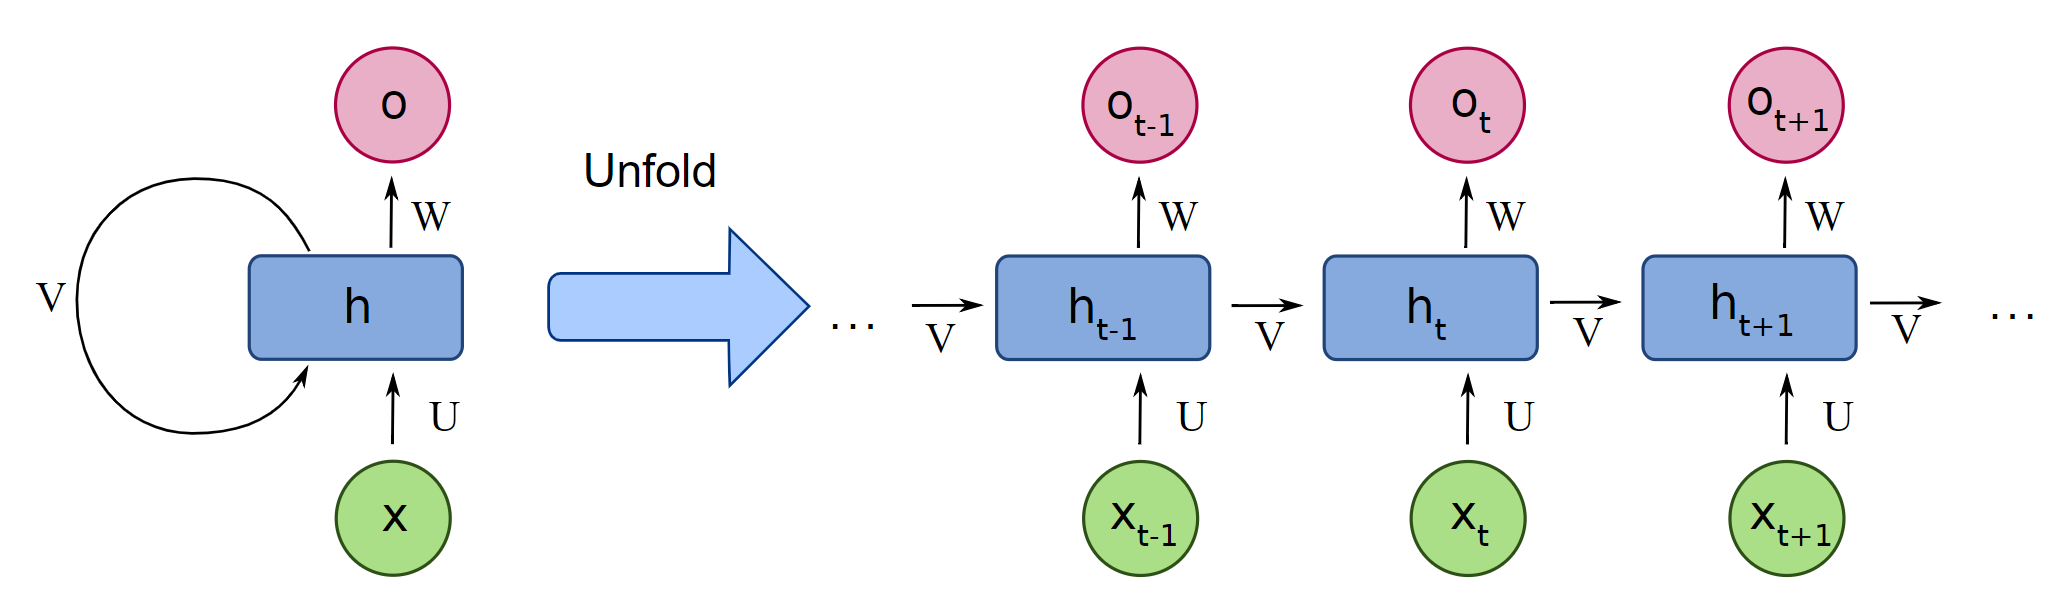



To understand RNN in detail go to this links<br/>

1. [Why use RNN instead of simple NN?](https://www.quora.com/Why-do-we-use-an-RNN-instead-of-a-simple-neural-network)
2. [RNN W1L03 ](https://www.youtube.com/watch?v=2E65LDnM2cA&list=PL1F3ABbhcqa3BBWo170U4Ev2wfsF7FN8l)

we need to tokenize the words before feeding it to RNN

In [ ]:
#use keras tokenizer
token = text.Tokenizer(num_words=None)
max_len = 70

token.fit_on_texts(list(X_train)+list(X_test))
X_train_sec = token.texts_to_sequences(X_train)
X_test_sec = token.texts_to_sequences(X_test)

X_train_pad = sequence.pad_sequences(X_train_sec,maxlen=max_len)
X_test_pad = sequence.pad_sequences(X_test_sec,maxlen=max_len)

word_index = token.word_index

Basically what we did with keras tokenizer is that we created a number for the word<br/>
simply because neural network can't understand word it understands numbers.

Now we will create a matrix which has glove vector at the row number which it is proveded by word_index above <br/>


Now we have unique number for each sentence.

Let's create simple RNN

In [ ]:
model = Sequential()
# we are not using pretrainde embedding yet.
model.add(Embedding(len(word_index)+1,25,input_length=max_len))
model.add(SimpleRNN(100))
model.add(Dense(3))
model.compile(loss='categorical_crossentropy',optimizer='adam')

In [ ]:
model.fit(X_train_pad,y=y_train_enc,epochs=5,batch_size=100,validation_data=(X_test_pad,y_test_enc))

Now we will create a matrix which has glove vector at the row number which it is proveded by word_index above

In [ ]:
embedding_matrix = np.zeros((len(word_index)+1,25)) #25 because we have word vector of dim 25

for word,i in word_index.items():
    #we use get() so it returns None if word is not found
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

**RNN with pretrained embeddings**

In [ ]:
model = Sequential()
# we are not using pretrainde embedding yet.
model.add(Embedding(len(word_index)+1,25,
                    weights=[embedding_matrix],
                    input_length=max_len,
                    trainable=False))
#as the weight are predefined trainable is False
model.add(SimpleRNN(100))
model.add(Dropout(0.2))

model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam')

In [ ]:
model.fit(X_train_pad,y=y_train_enc,epochs=5,batch_size=100,validation_data=(X_test_pad,y_test_enc))

## LSTM (Long Short Term Memory)

RNN where good at predicting the sequence of word or where they.<br/>
RNN performance was really good but there where cons attached to it.<br/>

RNN are not able to remember long term dependencies, it knows what is going around <br/>
but does not know what happend long back. What I means suppose we are trying to predict next <br/>
next word RNN knows that what happend 5 to 10 words before but, it dosen't have memory of past 1000 words.

And another problem with RNN was vanishing gradient. look at [this](https://www.youtube.com/watch?v=3Hn_hEPtciQ&list=PL1w8k37X_6L_s4ncq-swTBvKDWnRSrinI&index=8) video.

So to solve above two problems LSTM comes in, LSTM has capability of remembering long term dependencies<br/>
and also solved the problem of vanishing gradient.

So what is LSTM?

LSTM are basically RNN with gates, if you have watched previous videos on RNN<br/>
you might have notices RNN passes same weight matrix to each next recurrent unit.<br/>
Here in LSTM along with weight matrix an another parameter is passed call which regulates<br/>
how much of the information from the previous state should be passed to next state.

To understand more about LSTM look at this videos.

1. [LSTM Network - Explained](https://www.youtube.com/watch?v=QciIcRxJvsM)
2. [Recurrent Neural Networks (RNN) and Long Short-Term Memory (LSTM)](https://www.youtube.com/watch?v=QciIcRxJvsM)




In [ ]:
model = Sequential()

model.add(Embedding(len(word_index)+1,25,
                    weights=[embedding_matrix],
                    input_length=max_len,
                    trainable=False))

model.add(SpatialDropout1D(0.3))
model.add(LSTM(100,dropout=0.3,recurrent_dropout=0.3))

model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.8))

model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.8))

model.add(Dense(3))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')


In [ ]:
model.fit(X_train_pad,y=y_train_enc,batch_size=100,epochs=10,verbose=1,
          validation_data=(X_test_pad,y_test_enc))

## GRU

GRU's also like LSTM were developed to solve vanishing gradient problem and remembering<br/>
large sequence of data but GRU have different gete mechanish as compared to LSTM.

To understand more about GRU watch this videos.
1. [Illustrated Guide to LSTM's and GRU's: A step by step explanation](https://www.youtube.com/watch?v=QciIcRxJvsM) 
2. [RNN W1L09 : Gated Recurrent Unit GRU](https://www.youtube.com/watch?v=xSCy3q2ts44)



In [ ]:
model = Sequential()

model.add(Embedding(len(word_index)+1,25,
                    weights=[embedding_matrix],
                    input_length=max_len,
                    trainable=False))

model.add(SpatialDropout1D(0.3))
model.add(GRU(100))

model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.8))

model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.8))

model.add(Dense(3))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')



In [ ]:
model.fit(X_train_pad,y=y_train_enc,batch_size=100,epochs=5,verbose=1,validation_data=(X_test_pad,y_test_enc))

# Bidirectional LSTM

Sometimes inorder to understand the context of the sequence we need to see things in past as well<br/>
as the future for example "I like Apple they make very good phones" so inorder to understand what <br/>
apple here stands for architecture need to look at the word phone and that is what bidirectional LSTM does<br/>
it inputs sequence from before and after the current word.

To know more on Bidirectional Networks watch this<br/>
1. [RNN W1L11 : Bidirectional RNN](https://www.youtube.com/watch?v=bTXGpATdKRY)


In [ ]:
model = Sequential()

model.add(Embedding(len(word_index)+1,25,
                    weights=[embedding_matrix],
                    input_length=max_len,
                    trainable=False))

model.add(Bidirectional(LSTM(25, dropout=0.3, recurrent_dropout=0.3)))
    
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.8))

model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.8))

model.add(Dense(3))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')


In [ ]:
model.fit(X_train_pad,y=y_train_enc,batch_size=100,epochs=5,verbose=1,validation_data=(X_test_pad,y_test_enc))

This is the end of second notebook next notebook we will learn about more advance stuff and state-of-the-art models.